In [1]:
import pandas as pd
import numpy as np

In [2]:
telco = pd.read_csv('C://Users/mkrijal/Desktop/Assignment1/Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'].str.replace(' ',''), errors='force') #change obj to float

In [5]:
from scipy.stats import mode

mode(telco['TotalCharges'])

telco['TotalCharges'].fillna(mode(telco['TotalCharges']).mode[0], inplace=True) #input missing values

In [6]:
telco['TotalCharges'].dtypes

dtype('float64')

In [11]:
telco_serv = telco[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MonthlyCharges','Churn']]
telco_serv.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,29.85,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,56.95,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,53.85,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,42.30,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,70.70,Yes


In [15]:
telco_serv.groupby(telco_serv['InternetService']).size()

InternetService
DSL            2421
Fiber optic    3096
No             1526
dtype: int64

In [16]:
telco_serv.groupby(telco_serv['InternetService']).mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


In [23]:
#function min and max
def get_stats(group):
    return {'min': group.min(), 'max': group.max()}

telco_serv['MonthlyCharges'].groupby([telco_serv['InternetService']]).apply(get_stats)

InternetService     
DSL              max     94.80
                 min     23.45
Fiber optic      max    118.75
                 min     67.75
No               max     26.90
                 min     18.25
Name: MonthlyCharges, dtype: float64

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

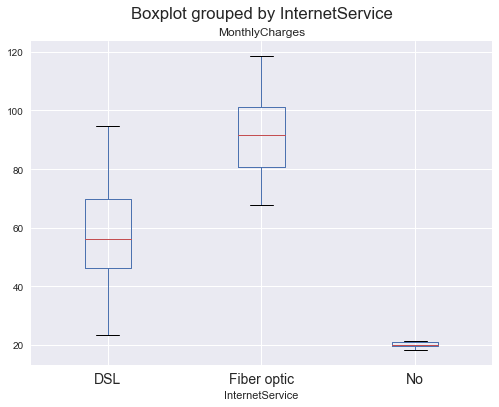

In [27]:
telco_serv.boxplot(column="MonthlyCharges",by="InternetService")

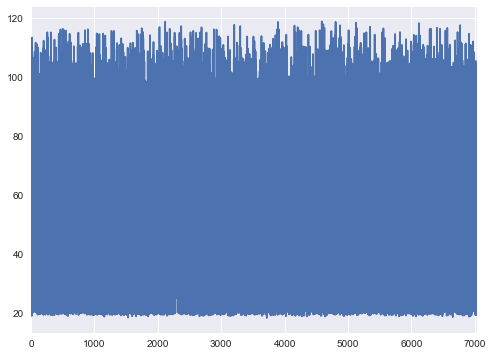

In [28]:
telco_serv.MonthlyCharges.plot()

In [29]:
# correlation matrix (ranges from 1 to -1)
telco_serv.corr()

,MonthlyCharges
MonthlyCharges,1.0


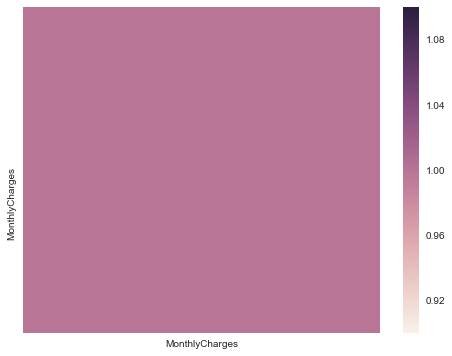

In [30]:
sns.heatmap(telco_serv.corr())

In [31]:
def num(strA):  #change string to numbers
    if strA == 'Fiber optic':
        return 1
    elif strA == 'DSL':
        return 0.5
    else:
        return 0

In [32]:
telco_serv['InternetService'] = telco_serv['InternetService'].apply(num)
telco_serv['InternetService'].head()

C:\Users\mkrijal\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0    0.5
1    0.5
2    0.5
3    0.5
4    1.0
Name: InternetService, dtype: float64

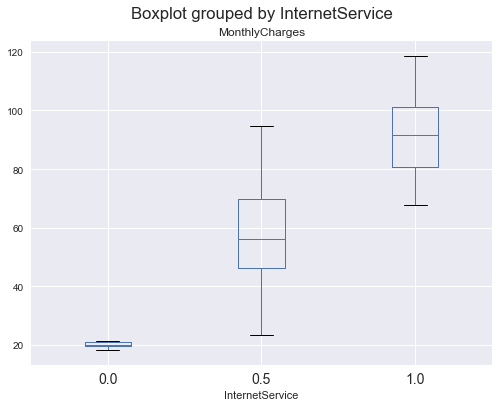

In [33]:
telco_serv.boxplot(column="MonthlyCharges",by="InternetService")

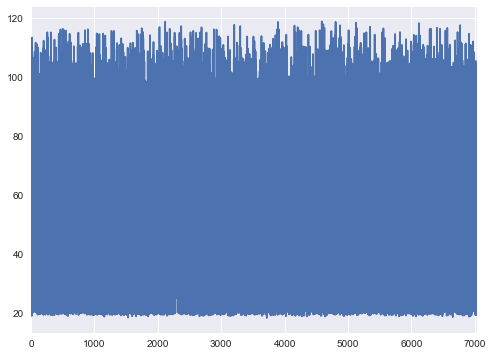

In [34]:
telco_serv.MonthlyCharges.plot()

In [35]:
telco_serv.corr()

,InternetService,MonthlyCharges
InternetService,1.000000,0.905491
MonthlyCharges,0.905491,1.000000


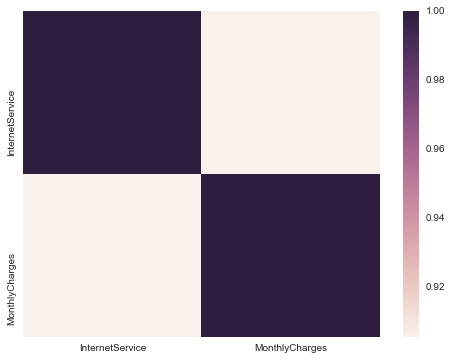

In [36]:
sns.heatmap(telco_serv.corr())